# Analizar y limpar las encuestas de salidas de empleados.


En este proyecto, limpiaremos y analizaremos las encuestas de salida de los empleados del Departamento de Educación,
Capacitación y Empleo (DETE)}) y el organismo de Educación Técnica y Continua (TAFE) del gobierno de Queensland en
Australia. La encuesta de salida de TAFE se puede encontrar aquí y la encuesta de DETE se puede encontrar aquí.

Fingiremos que nuestras partes interesadas quieren que combinemos los resultados de ambas encuestas para responder la
siguiente pregunta:

¿Los empleados que solo trabajaron para los institutos por un período corto de tiempo renuncian debido a algún tipo de
insatisfacción? ¿Qué pasa con los empleados que llevan más tiempo allí?

# Introducción

Lo primero que realizaremos es leer nuestro dataset, transformarlos en dataframe para su manipulación y realizaremos una
exploración inicial de los datos.

In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 150
dete_survey = pd.read_csv("dete_survey.csv", encoding="cp1252")
tafe_survey = pd.read_csv("tafe_survey.csv", encoding="cp1252")
print(dete_survey.head(),"\n")
print(tafe_survey.head(),"\n")



   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [581]:
print(dete_survey.info(),"\n\n","dete_survey dataframe tiene {0} filas y {1} columnas".format(dete_survey.shape[0],
                                                                                       dete_survey.shape[1]), "\n")
print(tafe_survey.info(),"\n\n","tafe_survey dataframe tiene {0} filas y {1} columnas".format(tafe_survey.shape[0],
                                                                                       tafe_survey.shape[1]),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

De la exploración de datos de ambos dataframe podemos hacer las siguientes observaciones:
* El dataframe dete_survey tiene variables como "Not-stated" que indican que faltan valores pero no se representan como
NaN.
* Tanto como dete_survey como tafe_surbey contienen demasiadas columnas que no utilizaremos para completar nuestro
análisis.
* Ambos datadaframes tienen las mismas preguntas pero los nombre de las columnas son diferentes.
* Existen varias columnas de respuesta que indican que el motivo de renuncia fue porque el empleado no estaba satisfecho.

A continuación lo que haremos es que los valores "Not Stated" de la data los convertiremos a NaN para proseguir con
nuestro análisis de datos.

In [582]:
dete_survey = pd.read_csv("dete_survey.csv", encoding="cp1252", na_values="Not Stated")
print(dete_survey.head(),"\n")

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

Ahora eliminaremos las columnas no relevantes para nuestro análisis y tener ambos dataframes mas compactos.

In [583]:
dete_survey_updated = dete_survey.drop(dete_survey.iloc[:,28:49], axis=1)
print(dete_survey_updated.columns, "\n")

tafe_survey_updated = tafe_survey.drop(tafe_survey.iloc[:,17:66], axis=1)
print(tafe_survey_updated.columns, "\n")
print(tafe_survey_updated.notnull().sum())

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object') 

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

## Renombrar las columnas
Las columnas de ambos dataframe deben de tener los mismos nombres para que al combinar los dataframes existan problemas
o pérdida de datos.


In [584]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
print(dete_survey_updated.columns, "\n")


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object') 



In [585]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
           'Gender.What is your Gender?': 'gender', 'CurrentAge.Current Age': 'age',
           'Employment Type.Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
print(tafe_survey_updated.columns,"\n")

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object') 



In [586]:
print(dete_survey_updated.loc[:,"separationtype"].value_counts(dropna=False),"\n\n")
print(tafe_survey_updated.loc[:,"separationtype"].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


Para los propósitos de este proyecto la pregunta que deseamos responder es la siguiente:
* ¿Los empleados que solo han trabajado para los institutos por un período corto de tiempo renuncian debido a algún tipo
de insatisfacción?.
* ¿Qué pasa con los empleados que llevan más tiempo en el trabajo?

Lo que haremos es filtrar los datos y solo vamos a mantener aquellos "resignation" que es lo que queremos analizar.

In [587]:
dete_resignation = dete_survey_updated.copy()
dete_resignation["separationtype"] = dete_resignation.loc[:,"separationtype"].str.split("-").str[0]
pattern = r"Resignation"
boolean_dete = dete_survey_updated.loc[:,"separationtype"].str.contains(pattern,na=False)
dete_resignation = dete_resignation.loc[boolean_dete,:]
print(dete_resignation.loc[:,"separationtype"].value_counts(dropna=False),"\n\n")

boolean_tafe = tafe_survey_updated.loc[:,"separationtype"].str.contains(pattern,na=False)
tafe_resignation = tafe_survey_updated.copy().loc[boolean_tafe,:]
print(tafe_resignation.loc[:,"separationtype"].value_counts(dropna=False))

Resignation    311
Name: separationtype, dtype: int64 


Resignation    340
Name: separationtype, dtype: int64


## Verificación de los datos
A continuación, limpiamos y exploramos las columnas cease_date y dete_start_date para asegurarnos de que todos los años
tengan sentido.

Usaremos los siguientes criterios:
* La columna cease_date es el último año de empleo de la persona y dete_start_date es el primer año de empleo de la
persona, no tendría sentido tener años posteriores a la fecha actual.
* Como la mayoría de las personas en este campo comienzan a trabajar a los 20 años, también es poco probable que
dete_start_date fuera anterior al año 1940.

In [588]:
print(dete_resignation.loc[:,"cease_date"].value_counts(dropna=False),"\n\n")
dete_resignation["cease_date"] = dete_resignation.loc[:,"cease_date"].str.split("/").str[-1]
dete_resignation["cease_date"] = dete_resignation.loc[:,"cease_date"].astype("float")
print(dete_resignation.loc[:,"cease_date"].value_counts(dropna=False).sort_index(ascending=False),"\n\n")
print(dete_resignation.loc[:,"dete_start_date"].value_counts(dropna=False).sort_index(ascending=False),"\n\n")

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64 


2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64 


2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64 




In [589]:
print(tafe_resignation.loc[:,"cease_date"].value_counts(dropna=False).sort_index(ascending=False),"\n\n")

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64 




A continuación se muestran nuestros hallazgos:

* Los años en ambos dataframe no se alinean completamente.

* El dataframe tafe_resignation contiene algunas fechas de renuncia de empleados desde el 2009, y además tiene un
faltante de 5 datos (NaN) que representa el 1,47% por lo que podemos prescindir de ellos. En el dataframe de
dete_resignation no ocurre la misma tenemos fechas de renuncia que se remontan desde al 2006.

* Encontramos que el de dataframe dete_resignation tiene mas fechas de renuncia en los años 2012 y 2013, mientras
que el dataframe tafe la mayoría de las renuncias ocurrieron esntre el 2011 y 2012, tienen un defase de un año respecto
al dete dataframe.

* Como no es objeto de estudio analizar los resultados por año, los dejaremos como están.


## Creación de nueva columna (institute_service) años de servicio.

Para alcanzar el objetivo final es necesario crear una columna que tenga la cantidad de tiempo que un empleado pasó en
su lugar de trabajo (aos de servicio) en ambos dataframes que están en análisis.

Nuesto objetivo final: ¿Los empleados que solo han trabajado para los institutos durante un corto período de tiempo
renuncian debido a algún tipo de insatisfacción? ¿Qué pasa con los empleados que llevan más tiempo en el trabajo?

El dataframe tafe_resignations ya contiene una columna de "servicio", que cambiamos de nombre a institute_service.
A continuación, calcularemos los años de servicio en el dataframe dete_resignation restando la columna cease_date
con la columna dete_start_date y el resultado de éstos será la columna institute_service

In [590]:
dete_resignation["institute_service"] = dete_resignation.loc[:,"cease_date"] - dete_resignation.loc[:,"dete_start_date"]
print(dete_resignation.loc[:,"institute_service"].value_counts(dropna=False).sort_index(ascending=False),"\n\n")

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
NaN     38
Name: institute_service, dtype: int64 




## Identificación de empleados isatisfechos con la institución
A continuación, identificaremos a los empleados que renunciaron porque no estaban satisfechos con la institución, se
ilustrará las columnas que usaremos para clasificar a los empleados como "insatisfechos"en cada dataframe:

* Del dataframe dete_resignation para determinar la insatisfacción de los empleados utilizaremos estas columnas:
    * dafe_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

* Del dataframe tafe_resignation para determinar la insatisfacción de los empleados utilizaremos estas columnas:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction

Si el empleado indicó que alguno de los factores anteriores causó la renuncia, lo marcaremos como insatisfecho en una
nueva columna que será llamada dissatisfied en ambos dataframes. Después de nuestros cambios, la nueva columna
contendrá solo los siguientes valores:

* True: indica que una persona renunció porque estaba insatisfecha de alguna manera
* False: indica que una persona renunció por una razón distinta a la insatisfacción con el trabajo.
* NaN: indica que es un valor faltante o missing value

In [591]:
#print(tafe_resignation.head(),"\n\n")
print(tafe_resignation.loc[:,"Contributing Factors. Dissatisfaction"].value_counts(dropna=False),"\n\n")
print(tafe_resignation.loc[:,"Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))

def transformation(x):
    if x == "-":
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64 


-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [592]:
tafe_resignation["dissatisfied"] = tafe_resignation.loc[:,["Contributing Factors. Dissatisfaction",
                                                       "Contributing Factors. Job Dissatisfaction"]]\
                                                        .applymap(transformation).any(axis=1, skipna=False)
print(tafe_resignation.loc[:,"dissatisfied"].value_counts(dropna=False),"\n\n")

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64 




In [593]:
lista = ['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']
for value in lista:
    print(dete_resignation.loc[:,value].value_counts(dropna=False),"\n\n")

False    270
True      41
Name: job_dissatisfaction, dtype: int64 


False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64 


False    305
True       6
Name: physical_work_environment, dtype: int64 


False    278
True      33
Name: lack_of_recognition, dtype: int64 


False    297
True      14
Name: lack_of_job_security, dtype: int64 


False    293
True      18
Name: work_location, dtype: int64 


False    288
True      23
Name: employment_conditions, dtype: int64 


False    243
True      68
Name: work_life_balance, dtype: int64 


False    284
True      27
Name: workload, dtype: int64 




In [594]:
dete_resignation["dissatisfied"]= dete_resignation.loc[:,lista].any(axis=1, skipna=False)
print(dete_resignation.loc[:,"dissatisfied"].value_counts(dropna=False),"\n\n")


False    162
True     149
Name: dissatisfied, dtype: int64 




## Combinando ambos dataframes

A continuación, agregaremos la columna "institute" para diferenciar los datos de cada dataframe al combinarlos Luego,
combinaremos los marcos de datos y eliminaremos las columnas restantes que no necesitemos.

In [595]:
dete_resignation["institute"] = "DETE"
tafe_resignation["institute"] = "TAFE"
print(dete_resignation.head(),"\n\n")
print(tafe_resignation.head(),"\n\n")

combined = pd.concat([dete_resignation, tafe_resignation], ignore_index=True)

    id separationtype  cease_date  dete_start_date  role_start_date  \
3    4    Resignation      2012.0           2005.0           2006.0   
5    6    Resignation      2012.0           1994.0           1997.0   
8    9    Resignation      2012.0           2009.0           2009.0   
9   10    Resignation      2012.0           1997.0           2008.0   
11  12    Resignation      2012.0           2009.0           2009.0   

            position classification                region  \
3            Teacher        Primary    Central Queensland   
5   Guidance Officer            NaN        Central Office   
8            Teacher      Secondary      North Queensland   
9       Teacher Aide            NaN                   NaN   
11           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  career_move_to_public_sector  \
3                    NaN  Permanent Full-time                         False   
5   Education Queensland  Permanent Full-time   

In [596]:
print(combined.notnull().sum().sort_values(),"\n\n")
combined = combined.dropna(thresh=500, axis=1)
print(combined.notnull().sum().sort_values(),"\n\n")

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
Classification.     Classification                     290
gender                                                 302
age                                                    3

## Limpieza de la columna "institute_service"

A continuación, limpiaremos la columna "institute_service" y clasificaremos a los empleados de la siguiente manera:

* New: menos de 3 años en el lugar de trabajo
* Experienced: 3-6 años en el lugar de trabajo
* Established: 7-10 años en el lugar de trabajo
* Veteran: 11 años o más en el lugar de trabajo

El análisis se basa del [siguiente artículo](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage),
que sostiene el argumento de que es más eficaz comprender las necesidades de los empleados según su etapa dentro de la
institución en vez de tomar en cuenta la edad.


In [597]:
print(combined.loc[:,"institute_service"].value_counts(dropna=False),"\n\n")
combined["institute_service_up"] = combined.loc[:,"institute_service"].astype("str").str.extract(r"(\d+)")
combined["institute_service_up"] = combined.loc[:,"institute_service_up"].astype("float")
print(combined.loc[:,"institute_service_up"].value_counts(dropna=False),"\n\n")

def employee_type(x):
    if x < 3:
        return "New"
    elif 3 <= x <= 6:
        return "Experienced"
    elif 7 <= x <= 10:
        return "Established"
    elif x >= 11:
        return "Veteran"
    elif pd.isnull(x):
        return np.nan
combined["service_cat"] = combined.loc[:,"institute_service_up"].apply(employee_type)
print(combined.loc[:,"service_cat"].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


## Análisis final
Finalmente, se reemplazará los valores NaN en la columna "dissatisfied" con el valor más frecuente, "False". Luego,
se calculará el porcentaje de empleados que renunciaron por insatisfacción en cada grupo de la columna de "service_cat"
y graficaremos los resultados.

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


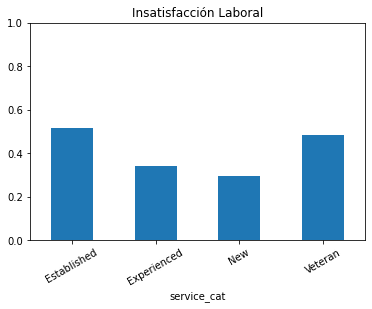

In [598]:
print(combined.loc[:,"dissatisfied"].value_counts(dropna=False))
combined["dissatisfied"] = combined.loc[:,"dissatisfied"].fillna(False)
%matplotlib inline
pivot = combined.pivot_table(index="service_cat", values="dissatisfied")
pivot.plot(kind="bar", rot=30, title="Insatisfacción Laboral", legend=False, ylim=(0,1))
plt.show()

Del análisis inicial anterior, podemos concluir tentativamente que los empleados con 7 o más años de servicio tienen más
probabilidades de renunciar debido a algún tipo de insatisfacción a diferencia de los empleados con menos de 7 aos de
servicio.

Sin embargo, necesitamos manejar el resto de los datos faltantes para finalizar nuestro análisis.
